Epoch 1/5


C:\Users\ADITYA\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8737 - loss: 0.4391
Epoch 2/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9632 - loss: 0.1253
Epoch 3/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9762 - loss: 0.0791
Epoch 4/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9818 - loss: 0.0594
Epoch 5/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9861 - loss: 0.0454
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9751 - loss: 0.0845
Test accuracy: 0.9751
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


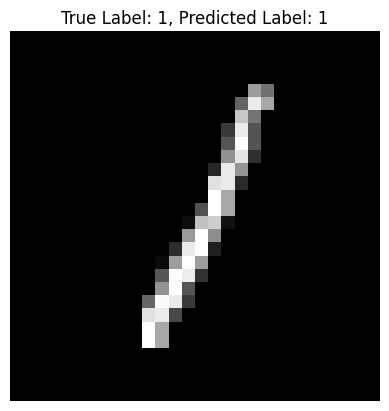

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 1: Load the custom dataset from CSV file
data = pd.read_csv(r"E:\Deep Learning Datasets-20241106T032755Z-001\Deep Learning Datasets\3 MNIST\mnist_784_csv.csv")  # Replace with your actual file path

# Separate features (pixel values) and labels (class)
X = data.drop(columns=['class'])  # Drop the 'class' column for features
y = data['class']                 # Use the 'class' column as labels

# Normalize the images by scaling pixel values to [0, 1]
X = X / 255.0

# Reshape data to 28x28 images as the model expects this shape
X = X.values.reshape(-1, 28, 28)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create the model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten the input
    layers.Dense(128, activation='relu'),   # Hidden layer with ReLU activation
    layers.Dense(10, activation='softmax')  # Output layer with softmax activation
])

# Step 4: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the model
model.fit(X_train, y_train, epochs=5)

# Step 6: Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

# Step 7: Make a prediction on a random test image
random_index = np.random.randint(0, X_test.shape[0])
test_image = X_test[random_index]

# Reset index of y_test to avoid KeyError
y_test_reset = y_test.reset_index(drop=True)
test_label = y_test_reset[random_index]

# Predict the class
predicted_label = np.argmax(model.predict(np.expand_dims(test_image, axis=0)))

# Step 8: Visualize the test image and prediction
plt.imshow(test_image, cmap='gray')
plt.title(f'True Label: {test_label}, Predicted Label: {predicted_label}')
plt.axis('off')
plt.show()